In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animate
from IPython.display import HTML
animate.rcParams['animation.embed_limit'] = 80
%matplotlib inline

In [6]:
def distance(cities):
    city1,city2 = cities,np.roll(cities,-1,axis=1)
    x1,y1 = city1[0],city1[1]
    x2,y2 = city2[0],city2[1]
    d =  np.sqrt((x2-x1)**2+(y2-y1)**2) 
    return np.sum(d)

def newroute(cities):
    cities_ = np.copy(cities)
    p = np.random.randint(N)
    l = np.random.randint(N//2)
    cities_[0][p:p+l+1] = cities[0][p:p+l+1][::-1]
    cities_[1][p:p+l+1] = cities[1][p:p+l+1][::-1]
    return cities_

def threshold(cities):
    cities_ = newroute(cities)
    if distance(cities_)<=distance(cities):
        cities = cities_
    return cities

def boltzmann(cities,T):
    cities_ = newroute(cities)
    if T > distance(cities_)-distance(cities):
        cities = cities_
    return cities

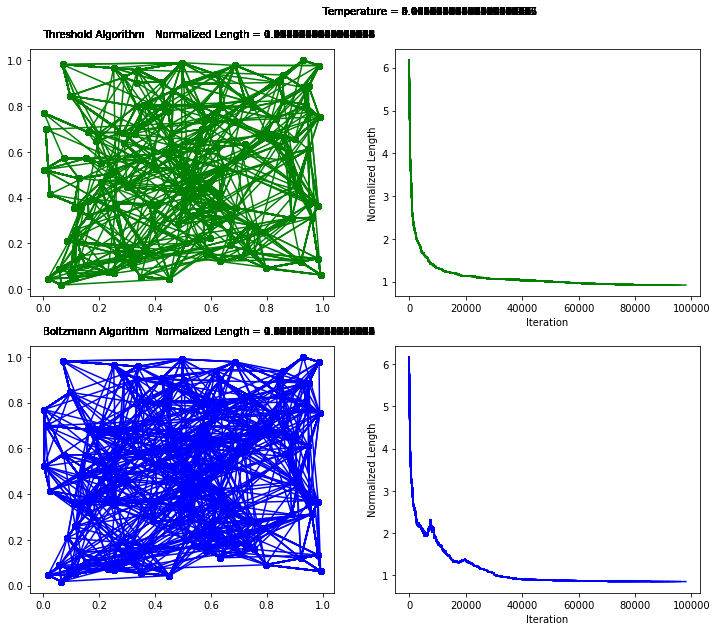

In [23]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
im = []

L = 1
N = 150
x, y = [],[]
for i in range(N):
    x.append(np.random.random())
    y.append(np.random.random())

cities = np.array([np.array(x), np.array(y)])

cities1,cities2 = cities,cities
norml1 = []
norml2 = []
Temp = []


iteration = 100000 # number of iterations
T = L/8 #initial temperature
for i in np.arange(iteration):
    Temp.append(T)
    
    l1 = distance(cities1)/(L*np.sqrt(N))
    l2 = distance(cities2)/(L*np.sqrt(N))
    norml1.append(l1)
    norml2.append(l2)
    
    cities1 = threshold(cities1)
    cities2 = boltzmann(cities2,T)
    
    if i % 100 == 0:
        x = np.random.choice([0,1])
        if x == 0: T = T - 0.1*T
        if x == 1: T = T + 0.1*T
        
    if i%2000 == 0:
        threshold_plot, = ax1.plot(cities1[0],cities1[1],'g-o', animated = True)
        title_1 = ax1.annotate('Threshold Algorithm', xy=(0.0, 1.1), xycoords='data', annotation_clip=False)
        threshold_length_normal = ax1.annotate('Normalized Length = ' + str(l1), xy=(0.4, 1.1), xycoords='data', annotation_clip=False)
        boltzmann_temp = ax1.annotate('Temperature = ' + str(T), xy=(1, 1.2), xycoords='data', annotation_clip=False)
        
        
        boltzmann_plot, = ax3.plot(cities2[0],cities2[1],'b-o', animated = True)
        title_2 = ax3.annotate('Boltzmann Algorithm', xy=(0.0, 1.1), xycoords='data', annotation_clip=False)
        boltzmann_length_normal = ax3.annotate('Normalized Length = ' + str(l2), xy=(0.4, 1.1), xycoords='data', annotation_clip=False)
        
        threshold_length, = ax2.plot(norml1, 'g', animated = True)
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Normalized Length')
        
        boltzmann_length, = ax4.plot(norml2, 'b', animated = True)
        ax4.set_xlabel('Iteration')
        ax4.set_ylabel('Normalized Length')
        
        
        im.append([threshold_plot,boltzmann_plot,threshold_length, boltzmann_length, title_1, title_2, threshold_length_normal, boltzmann_length_normal,
                  boltzmann_temp])

In [24]:
ani = animate.ArtistAnimation(fig, im, interval = 150, blit = True)
HTML(ani.to_jshtml(fps=5))

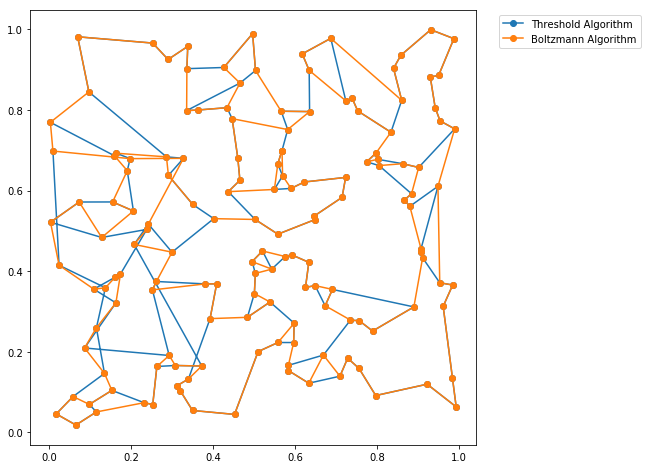

normalized length (threshold) =  0.9209317180002314
normalized length (boltzmann) =  0.8517456931889513


In [26]:
plt.figure(figsize=(8,8))
plt.plot(cities1[0],cities1[1],'-o', label = 'Threshold Algorithm')
plt.plot(cities2[0],cities2[1],'-o', label='Boltzmann Algorithm')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
print('normalized length (threshold) = ', l1)
print('normalized length (boltzmann) = ', l2)

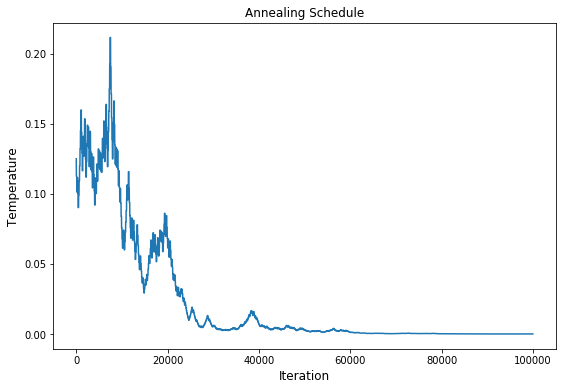

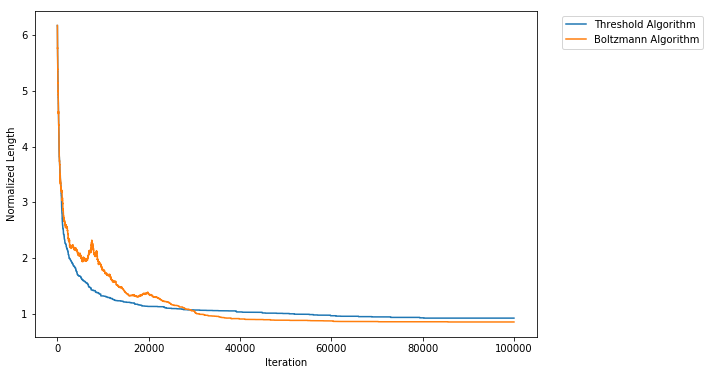

In [25]:
plt.figure(figsize=(9,6))
plt.plot(Temp)
plt.xlabel('Iteration',size='large')
plt.ylabel('Temperature',size='large')
plt.title("Annealing Schedule")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(norml1,label = 'Threshold Algorithm')
plt.plot(norml2, label = 'Boltzmann Algorithm')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel('Iteration')
plt.ylabel('Normalized Length')
plt.show()